# Financial Market Concepts

1. Types of Funds
2. Order Books
3. Latency Arbitrage (HFT)
4. Short Selling


3 Major Fund Types
1. ETF - Exchange Traded Funds
2. Mutual Funds
3. Hedge Funds

These funds vary by fees, transparency, regulation, and more

Hedge Funds are alt investment using pooled funds that employ numerous different strategies to earn active return, or alpha for their investors

Fees for each type
1. ETF Expense ratio - 0.01 to 1%
2. Mutual Funds - Expense ratio - 0.5 to 3%
3. Hedge Funds - 2% of Fund, 20% of profits (but no rules)

Mutual funds buy/sell EOD through broker

hedge funds won't disclose what they are doing with the money invested


### CAPM
Capital Asset Pricing Model
One of the most fundamental topics in investing
A portfolio is a set of weighted securities
We can get get weights for a copnay by using the market cap
market cap (#shares * price) / portfolio_market_cap

# y = mx +b
r(t) = Brm(t) + a(t)

The beta term implies that the return of a stock is equivalent to the return of the market multiplied by this Beta factro plus some
residual alpha term

If beta = 1 the stock moves inline with market
if beta = 2 it moves double the value of the broad market

the return of any individual stock is alpha.
CAPM states that you expect this alpha term to be zero

If alpha is zero then you cannot beat the general market

Passive vs Active investments.

Active believes they can predict alpha on some degree
better then 50% of the time

Return of Portfolio (at time T) = Beta term * Market Risk (at time T) + the weight of the stock in the portfolio * the Sum of the weighted portfolio stock alphas (at time T)

Active investors fundamentally disagree using quantitive and algorthmic trading using Quantopian Platform.



In [3]:
# Simple CAPM Example
from scipy import stats

In [5]:
# Calculate a linear least-squares regression for two sets of measurements.
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [17]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
spy_etf = web.DataReader('SPY','yahoo')

In [19]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-06 to 2020-05-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [20]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-06,209.929993,206.759995,209.559998,208.039993,135060200.0,188.259018
2015-05-07,209.380005,207.520004,207.919998,208.869995,88244900.0,189.010117
2015-05-08,211.860001,210.779999,210.880005,211.619995,155877300.0,191.498642
2015-05-11,211.889999,210.520004,211.570007,210.610001,75708100.0,190.584671
2015-05-12,210.630005,208.619995,209.610001,209.979996,119727600.0,190.014572


In [21]:
start = pd.to_datetime('2010-01-04')

In [22]:
end = pd.to_datetime('2017-07-25')

In [23]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [24]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


In [29]:
spy_etf = web.DataReader('SPY','yahoo',start,end)

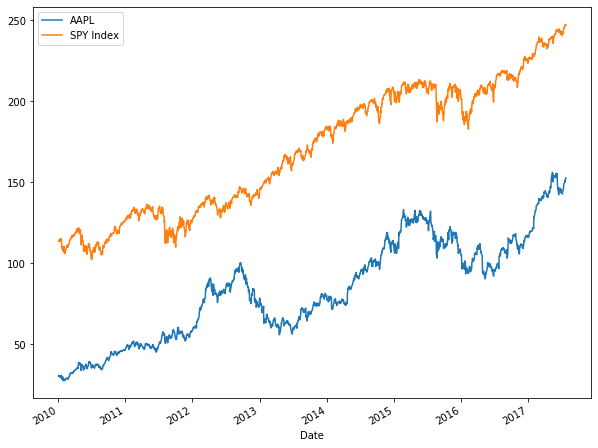

In [30]:
aapl['Close'].plot(label='AAPL',figsize=(10,8));
spy_etf['Close'].plot(label='SPY Index');
plt.legend()

In [31]:
aapl['Culumative'] = aapl['Close']/aapl['Close'].iloc[0]

In [32]:
spy_etf['Culumative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

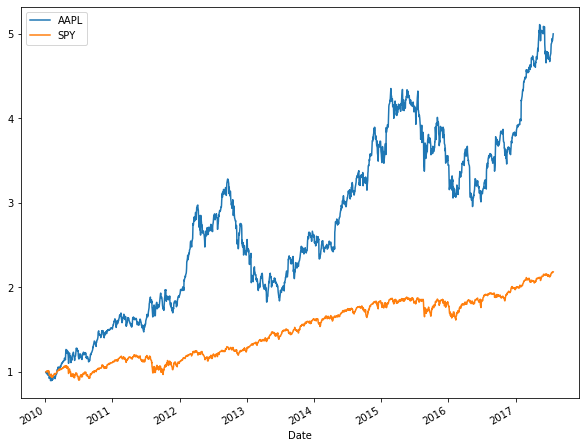

In [33]:
aapl['Culumative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Culumative'].plot(label='SPY')
plt.legend();

In [34]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)

In [35]:
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

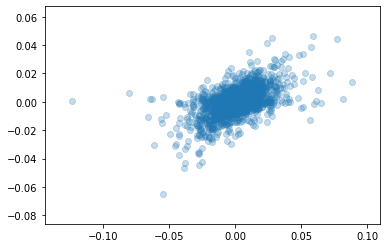

In [37]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25);

In [38]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                         spy_etf['Daily Return'].iloc[1:])
beta

0.32564474408628813

In [39]:
alpha

0.0001374400657702816

In [40]:
# how well these actually fit (this is not a great fit)
r_value

0.5555914696345486

In [41]:
import numpy as np

In [42]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))
noise

array([ 0.00046127,  0.00043738, -0.00153625, ...,  0.00019807,
        0.00045198, -0.00192036])

In [44]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

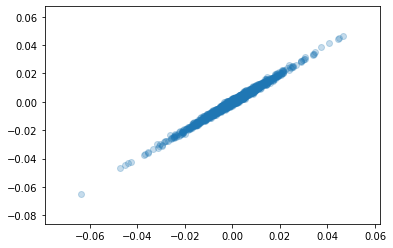

In [46]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25);

In [47]:
# clear relationship with the width being the noise

In [49]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock,
                                                         spy_etf['Daily Return'].iloc[1:])
beta

0.9918835306519345

In [50]:
# almost 1 which is highly correlated
alpha

-1.5419886650601758e-05

In [51]:
# with algo trading that creates a system that drives a stronger alpha value

# ALWAYS USE AJDUSTED CLOSE PRICES THAT TAKES INTO ACCOUNT STOCK SPLITS AND DIVIDENDS

In [52]:
#you can buy survivor bias free data from quandl

In [53]:
#Efficient Market Hypothesis - it is impossible to beat the market
#EMH
# Quants assume market is NOT 100% efficient